# Scattertext Visualisation

Since the corpus is not categorised, we will need to find ways of grouping items into categories. We can follow the following steps:

1. Make a df of all txt files
2. Analyse sentiment for each txt file
3. Create scatter text visualisation for positive/negative sentiment 
4. Repeat the same for subjectivity

In [1]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 345 kB/s eta 0:00:01
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9299 sha256=182c09a886533e90092d4c0fa9217ac084253aaca932ff3feb460b6ba554f393
  Stored in directory: /Users/tashfeen/Library/Caches/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext


In [17]:
import sys
import os
import pandas as pd
import scattertext as st
import datetime
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [18]:
# walk through the /data folder and read text files to make a df
textList = []
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        myfile = os.path.join(dirname, filename)
        with open(myfile, 'rb') as fopen:
            q = fopen.read().decode('ISO-8859-1')
            textList.append(q)
df = pd.DataFrame(textList)
df.columns = ['text']
df

text
0    IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...
1    IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...
2    CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC...
3    Vol. I 1931 THE Indian Journal of Veterinary S...
4    IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI...
..                                                 ...
463  [NLS note: a graphic appears here - see image ...
464  REPORT ON THE WORKING OF THE MENTAL HOSPITALS ...
465  ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...
466  SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...
467  [NLS note: a graphic appears here - see image ...

[468 rows x 1 columns]

In [19]:
text1 = TextBlob(df['text'][7])
text1.polarity

0.06607356380490707

In [20]:
def getPolarity(text):
    analyseText = TextBlob(text)
    return analyseText.polarity

df['polarity'] = df.apply(lambda x: getPolarity(x['text']), axis=1)

In [21]:
df

text  polarity
0    IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...  0.059503
1    IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...  0.051352
2    CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC...  0.056411
3    Vol. I 1931 THE Indian Journal of Veterinary S...  0.059796
4    IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI...  0.072439
..                                                 ...       ...
463  [NLS note: a graphic appears here - see image ...  0.100648
464  REPORT ON THE WORKING OF THE MENTAL HOSPITALS ... -0.016499
465  ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...  0.051914
466  SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...  0.138226
467  [NLS note: a graphic appears here - see image ...  0.054974

[468 rows x 2 columns]

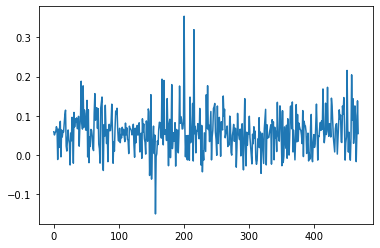

In [22]:
ypoints = df['polarity']
plt.plot(ypoints)
plt.show()

In [23]:
# Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
# For simplicity, we will keep the cutoff at 0.1

def positiveOrNot(polarity):
    if(polarity > 0.1):
        return 'positive'
    else:
        return 'negative'

df['sentiment'] = df.apply(lambda x: positiveOrNot(x['polarity']), axis=1)

In [24]:
df

text  polarity sentiment
0    IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...  0.059503  negative
1    IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...  0.051352  negative
2    CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC...  0.056411  negative
3    Vol. I 1931 THE Indian Journal of Veterinary S...  0.059796  negative
4    IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI...  0.072439  negative
..                                                 ...       ...       ...
463  [NLS note: a graphic appears here - see image ...  0.100648  positive
464  REPORT ON THE WORKING OF THE MENTAL HOSPITALS ... -0.016499  negative
465  ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...  0.051914  negative
466  SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...  0.138226  positive
467  [NLS note: a graphic appears here - see image ...  0.054974  negative

[468 rows x 3 columns]

In [25]:
df['sentiment'].value_counts()

negative    393
positive     75
Name: sentiment, dtype: int64

In [26]:
df.polarity.max()

0.3535714285714286

In [27]:
nlp = st.WhitespaceNLP.whitespace_nlp_with_sentences
df['parsed'] = df.text.apply(nlp)

In [28]:
df

text  polarity sentiment  \
0    IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...  0.059503  negative   
1    IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...  0.051352  negative   
2    CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC...  0.056411  negative   
3    Vol. I 1931 THE Indian Journal of Veterinary S...  0.059796  negative   
4    IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI...  0.072439  negative   
..                                                 ...       ...       ...   
463  [NLS note: a graphic appears here - see image ...  0.100648  positive   
464  REPORT ON THE WORKING OF THE MENTAL HOSPITALS ... -0.016499  negative   
465  ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...  0.051914  negative   
466  SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...  0.138226  positive   
467  [NLS note: a graphic appears here - see image ...  0.054974  negative   

                                                parsed  
0    (ip, /, qb, ., 10, m, ., 91, ., b, ., no, ., 4...  
1    (ip, /, 6, /, hg, ., s4, ., report, on, the, c...  
2    (cholera, in, india, ,, 1862, to, 1881, ., ben...  
3    (vol, ., i, 1931, the, indian, journal, of, ve...  
4    (ip, /, qb, ,, 10, m, ., 91, ., b, no, ., 19, ...  
..                                                 ...  
463  ([, nls, note, :, a, graphic, appears, here, -...  
464  (report, on, the, working, of, the, mental, ho...  
465  (icar, ., 15, ., viii, ., 650, vol, ., viii, 1...  
466  (sleeping, sickness, a, summary, of, the, work...  
467  ([, nls, note, :, a, graphic, appears, here, -...  

[468 rows x 4 columns]

In [47]:
df2 = df.tail(n=10)
df2

text  polarity sentiment  \
458  IP/QB.10 M. 91. b. No. 27. (NEW SERIES.) SCIEN...  0.089322  negative   
459  SEASON OF 1877-78. RETURNS OF VACCINATION FOR ...  0.143799  positive   
460  Annual Administration Reports of the Bombay Ve...  0.030009  negative   
461  IP/16/PI.4\r\n[NLS note: a graphic appears her...  0.053084  negative   
462  [NLS note: a graphic appears here - see image ...  0.125329  positive   
463  [NLS note: a graphic appears here - see image ...  0.100648  positive   
464  REPORT ON THE WORKING OF THE MENTAL HOSPITALS ... -0.016499  negative   
465  ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...  0.051914  negative   
466  SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...  0.138226  positive   
467  [NLS note: a graphic appears here - see image ...  0.054974  negative   

                                                parsed  
458  (ip, /, qb, ., 10, m, ., 91, ., b, ., no, ., 2...  
459  (season, of, 1877, -, 78, ., returns, of, vacc...  
460  (annual, administration, reports, of, the, bom...  
461  (ip, /, 16, /, pi, ., 4, [, nls, note, :, a, g...  
462  ([, nls, note, :, a, graphic, appears, here, -...  
463  ([, nls, note, :, a, graphic, appears, here, -...  
464  (report, on, the, working, of, the, mental, ho...  
465  (icar, ., 15, ., viii, ., 650, vol, ., viii, 1...  
466  (sleeping, sickness, a, summary, of, the, work...  
467  ([, nls, note, :, a, graphic, appears, here, -...

In [48]:
corpus = st.CorpusFromParsedDocuments(df2, category_col='sentiment', parsed_col='parsed').build()

In [56]:
html = st.produce_scattertext_explorer(corpus,
                                       category='negative',
                                       category_name='Negative Sentiment',
                                       not_category_name='Positive Sentiment',
                                       use_full_doc=True,
                                       minimum_term_frequency=1,
                                       pmi_filter_thresold=10,
                                       term_ranker=st.OncePerDocFrequencyRanker,
                                       width_in_pixels=100,
                                       sort_by_dist=False,
                                       metadata=df2['polarity'])

In [55]:
display(HTML(html))

In [43]:
open('./sentiment.html', 'w').write(html)

5116454